In [3]:
import numpy as np
import matplotlib.pyplot as plt


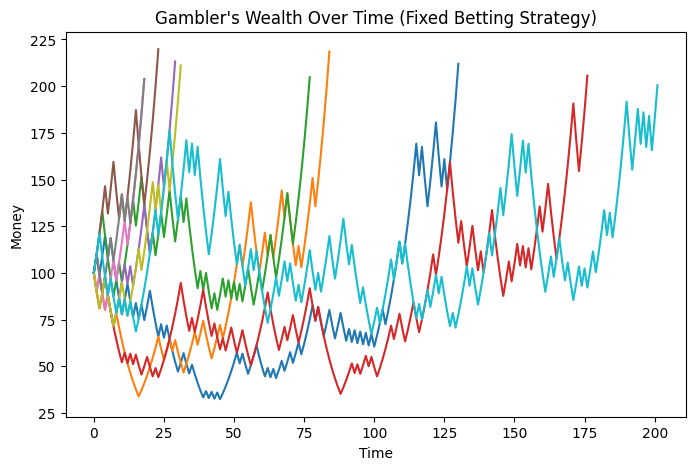

In [51]:
p = 0.6
X_0 = 100
w = 200
A = 0.1
num_sims = 10


def sim(p, X, w, A):
    history = [X]
    threshold = 1e-6
    while threshold <= X < w:
        S = np.random.choice([1, -1], p=[p, 1-p])  # Win or lose
        X = max(0, (1 + A * S) * X)
        history.append(X)

    return history

plt.figure(figsize=(8, 5))
for _ in range(num_sims):
    plt.plot(sim(p, X_0, w, A))

plt.xlabel("Time")
plt.ylabel("Money")
plt.title("Gambler's Wealth Over Time (Fixed Betting Strategy)")
plt.show()



## Value iteration to find optimal policy


In [53]:
# parameters

p = 0.4
gamma = 1
w = 2000
wealth_steps = 1
action_steps = 0.01
A = [i * action_steps for i in range(1,int(1 / action_steps) + 1)]
num_states = int(w / wealth_steps) + 1

X = X = [i * wealth_steps for i in range(num_states)]
V = [0 for _ in range(num_states)]
V[-1] = 1
iterations = 500

for _ in range(iterations):
    V_new = V.copy()
    for i in range(1, num_states - 1):
        best_value = 0
        for a in A:
            bet = a * X[i]
            X_win = min(w, X[i] + bet)
            X_lose = max(0, X[i] - bet)

            i_win = int(X_win / wealth_steps)
            i_lose = int(X_lose / wealth_steps)

            expected_value = p * V[i_win] + (1 - p) * V[i_lose]
            best_value = max(best_value, expected_value)

        V_new[i] = best_value
    V = V_new



optimal_policy = [0 for _ in range(num_states)]
for i in range(1, num_states - 1):
    best_a = 0
    best_value = 0
    for a in A:
        bet = a * X[i]
        X_win = min(w, X[i] + bet)
        X_lose = max(0, X[i] - bet)

        i_win = int(X_win / wealth_steps)
        i_lose = int(X_lose / wealth_steps)

        expected_value = p * V[i_win] + (1 - p) * V[i_lose]
        if expected_value > best_value:
            best_value = expected_value
            best_a = a

    optimal_policy[i] = best_a

for i in range(num_states):
    print("X: ", X[i], "Optimal Policy: ", optimal_policy[i])


X:  0 Optimal Policy:  0
X:  1 Optimal Policy:  1.0
X:  2 Optimal Policy:  1.0
X:  3 Optimal Policy:  1.0
X:  4 Optimal Policy:  1.0
X:  5 Optimal Policy:  1.0
X:  6 Optimal Policy:  1.0
X:  7 Optimal Policy:  1.0
X:  8 Optimal Policy:  1.0
X:  9 Optimal Policy:  1.0
X:  10 Optimal Policy:  1.0
X:  11 Optimal Policy:  1.0
X:  12 Optimal Policy:  1.0
X:  13 Optimal Policy:  1.0
X:  14 Optimal Policy:  1.0
X:  15 Optimal Policy:  1.0
X:  16 Optimal Policy:  1.0
X:  17 Optimal Policy:  1.0
X:  18 Optimal Policy:  1.0
X:  19 Optimal Policy:  1.0
X:  20 Optimal Policy:  1.0
X:  21 Optimal Policy:  1.0
X:  22 Optimal Policy:  1.0
X:  23 Optimal Policy:  1.0
X:  24 Optimal Policy:  1.0
X:  25 Optimal Policy:  1.0
X:  26 Optimal Policy:  1.0
X:  27 Optimal Policy:  1.0
X:  28 Optimal Policy:  1.0
X:  29 Optimal Policy:  1.0
X:  30 Optimal Policy:  1.0
X:  31 Optimal Policy:  1.0
X:  32 Optimal Policy:  1.0
X:  33 Optimal Policy:  1.0
X:  34 Optimal Policy:  1.0
X:  35 Optimal Policy:  1.0
X:  

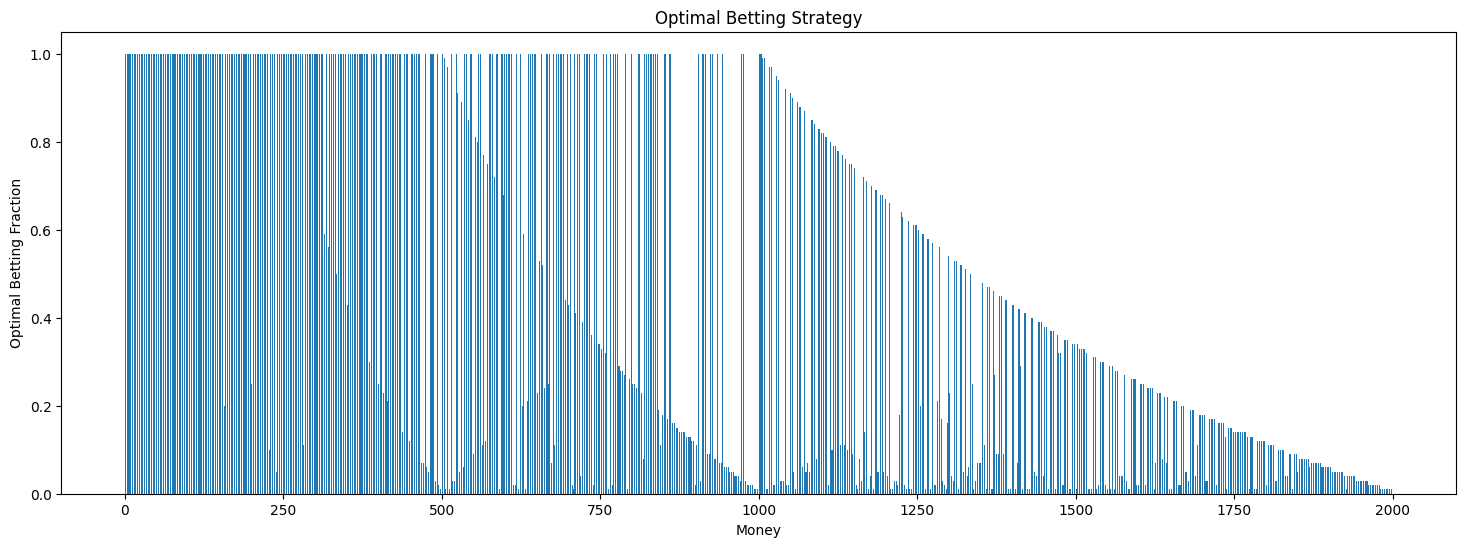

In [54]:
plt.bar(X, optimal_policy, width=wealth_steps*0.6)
plt.xlabel("Money")
plt.ylabel("Optimal Betting Fraction")
plt.title("Optimal Betting Strategy")
plt.gcf().set_size_inches(18, 6)
plt.show()

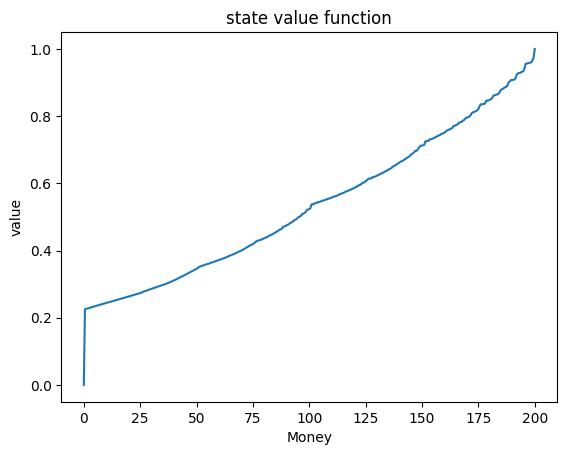

In [12]:
plt.plot(X, V)
plt.xlabel("Money")
plt.ylabel("value")
plt.title("state value function")
plt.show()

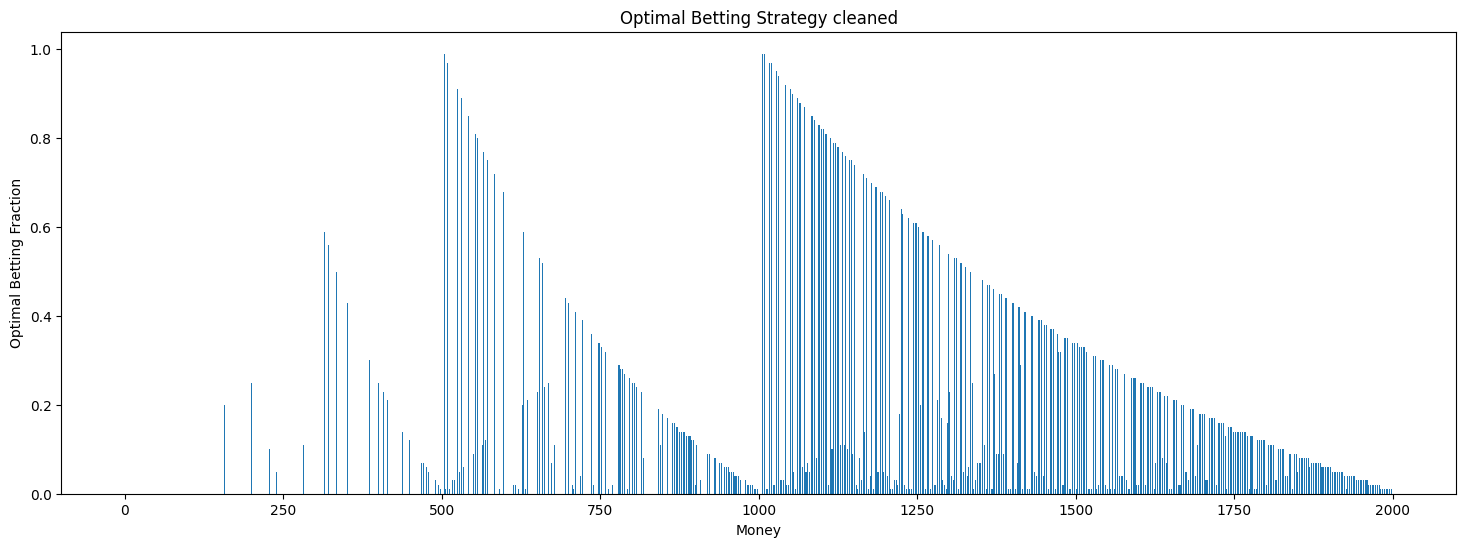

In [56]:
plt.bar(X, [i if i != 1 else 0 for i in optimal_policy], width=wealth_steps*0.6)
plt.xlabel("Money")
plt.ylabel("Optimal Betting Fraction")
plt.title("Optimal Betting Strategy cleaned")
plt.gcf().set_size_inches(18, 6)
plt.show()